In [1]:
import numpy as np
import matplotlib.pyplot as plt

from astropy import constants as c
from astropy.modeling.models import BlackBody
from astropy import units as u
from astropy.visualization import quantity_support

from AstroFilters import filters as filtVega

In [2]:
siSIwvl = u.W/u.m**2/u.m/u.steradian
siSIfreq = u.W/u.m**2/u.Hz/u.steradian

In [3]:
B_lambda = BlackBody(temperature=5778*u.K, scale=1.*siSIwvl)
B_nu = BlackBody(temperature=5778*u.K, scale=1.*siSIfreq)

In [4]:
wav = np.linspace(300, 1000, num=1000) * u.nm
freq = (c.c/wav).to(u.Hz)

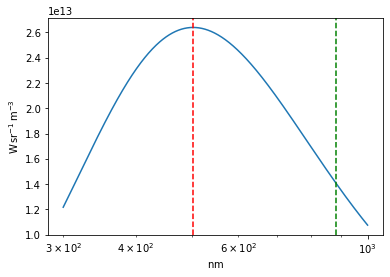

In [5]:
with quantity_support():
    plt.figure()
    plt.semilogx(wav, B_lambda(wav))
    plt.axvline(B_lambda.lambda_max.to(u.nm, equivalencies=u.spectral()).value, ls='--', color='red')
    plt.axvline(B_lambda.nu_max.to(u.nm, equivalencies=u.spectral()).value, ls='--', color='green')
    plt.show()

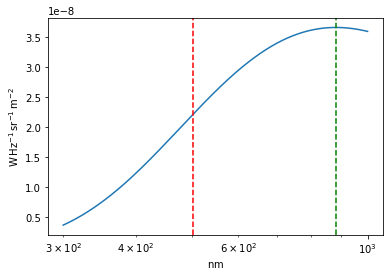

In [6]:
# Notice what happens here ... evaluating B_nu at wavelengths corresponding to some frequencies.  The wavelength
# at which B_lambda peak is not where B_nu peaks
with quantity_support():
    plt.figure()
    plt.semilogx(wav, B_nu(wav))
    plt.axvline(B_lambda.lambda_max.to(u.nm, equivalencies=u.spectral()).value, ls='--', color='red')
    plt.axvline(B_lambda.nu_max.to(u.nm, equivalencies=u.spectral()).value, ls='--', color='green')
    plt.show()

In [7]:
print(B_lambda.nu_max.to(u.THz), '   ', B_lambda.lambda_max.to(u.nm))

339.68429751497195 THz     501.51816462187134 nm


In [8]:
print(B_nu.nu_max.to(u.THz), '   ', B_nu.lambda_max.to(u.nm))

339.68429751497195 THz     501.51816462187134 nm


Text(0, 0.5, 'Fraction transmitted')

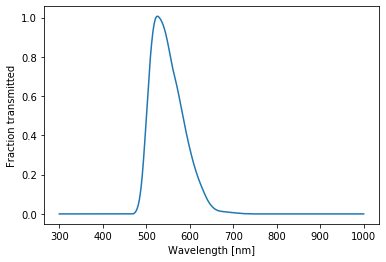

In [9]:
# Let's look at the V-band filter 
plt.plot(wav, filtVega['V']['shape'](wav))
plt.xlabel('Wavelength [nm]')
plt.ylabel('Fraction transmitted')

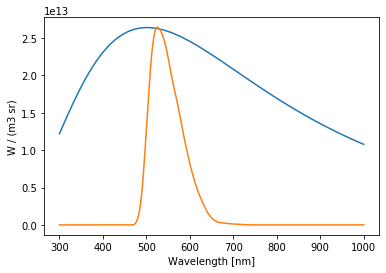

In [10]:
# How does it compare to the blackbody spectrum
plt.plot(wav, B_lambda(wav))
plt.plot(wav, filtVega['V']['shape'](wav)*B_lambda(wav))
plt.xlabel('Wavelength [nm]')
plt.ylabel(B_lambda(wav).unit)
plt.show()

In [11]:
filtVega['V']

{'shape': <scipy.interpolate._cubic.CubicSpline at 0xb18774f50>,
 'wvl_mean': <Quantity 549.9192738 nm>,
 'dwvl': <Quantity 87.68274861 nm>,
 'zero': <Quantity 3.55e-09 erg / (Angstrom cm2 s)>}

In [12]:
# Calculate a flux density
f_V = (np.trapz(filtVega['V']['shape'](wav)*B_lambda(wav),x=wav)
*np.pi*u.steradian/filtVega['V']['dwvl']*4.*np.pi*np.power(10*c.R_sun, 2)/(4.*np.pi*np.power(10*u.pc,2))).to(u.W/u.m**2/u.m)

In [13]:
# Filter zero point
filtVega['V']['zero']

<Quantity 3.55e-09 erg / (Angstrom cm2 s)>

In [14]:
# Calculate a magnitude
-2.5*np.log10((f_V/filtVega['V']['zero']).to(u.dimensionless_unscaled))

<Quantity -0.1557943>